<a href="https://colab.research.google.com/github/antonellafontanetto/Achivos_Extras/blob/main/Modelo_no_supervisadoV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importamos las librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Cargamos el dataset de Producción

In [3]:
#Se utilizo la función usecols para extraer las features mas reelevantes del dataset
produccion = pd.read_csv('/content/produccion.zip', usecols=['anio','mes','idpozo','empresa','tipopozo','tipoestado','prod_gas','prod_pet','profundidad','areayacimiento','cuenca','provincia','sub_tipo_recurso','prod_agua','tipoextraccion','profundidad','areapermisoconcesion','coordenadax','coordenaday','proyecto','clasificacion','subclasificacion'])
produccion

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,tipoextraccion,tipoestado,tipopozo,empresa,...,areapermisoconcesion,areayacimiento,cuenca,provincia,coordenadax,coordenaday,proyecto,clasificacion,subclasificacion,sub_tipo_recurso
0,2018,1,132488,0.000000,171.937000,0.000000,Surgencia Natural,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,ESTACION FERNANDEZ ORO,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.864960,-39.016722,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
1,2017,1,130021,0.000000,245.850000,16.680000,Plunger Lift,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,ANTICLINAL CAMPAMENTO,ANTICLINAL CAMPAMENTO SUR,NEUQUINA,Neuquén,-69.733102,-39.024859,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
2,2018,1,132487,0.000000,514.696000,17.000000,Surgencia Natural,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,ESTACION FERNANDEZ ORO,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.837875,-39.019313,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT
3,2015,1,137212,0.000000,422.110000,0.000000,Bombeo Mecánico,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,AL NORTE DE LA DORSAL,GUANACO,NEUQUINA,Neuquén,-69.255971,-38.860779,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
4,2018,1,132361,0.000000,217.103000,7.300000,Surgencia Natural,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,AL NORTE DE LA DORSAL,GUANACO,NEUQUINA,Neuquén,-69.231360,-38.869270,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345377,2024,12,3640,14.049906,17.378994,72.385001,Bombeo Mecánico,Extracción Efectiva,Petrolífero,Petrolera Aconcagua Energia S.A.,...,ENTRE LOMAS,EL CARACOL,NEUQUINA,Neuquén,-68.452390,-37.954170,Sin Proyecto,EXPLOTACION,AVANZADA,SHALE
345378,2023,12,164872,0.000000,0.000000,0.000000,NaN,NaN,NaN,Petrolera Aconcagua Energia S.A.,...,ENTRE LOMAS,CHARCO BAYO,NEUQUINA,Rio Negro,-68.099940,-38.174340,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT
345379,2024,12,164374,60.960855,602.844409,63.852351,Surgencia Natural,Extracción Efectiva,Petrolífero,Petrolera Aconcagua Energia S.A.,...,ENTRE LOMAS,CHARCO BAYO,NEUQUINA,Rio Negro,-68.106619,-38.178494,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT
345380,2024,12,164873,0.000000,0.000000,0.000000,Surgencia Natural,Parado Transitoriamente,Gasífero,Petrolera Aconcagua Energia S.A.,...,ENTRE LOMAS,CHARCO BAYO,NEUQUINA,Rio Negro,-68.129670,-38.149710,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT


### Primer filtro del dataset

In [4]:
#Filtro por cada dataset solo los registros para YPF S.A., para la cuenca Neuquina y a partir del año 2021 inclusive
prod_ypf = produccion[(produccion['empresa'] == 'YPF S.A.')&(produccion['cuenca'] == 'NEUQUINA')&(produccion['anio']>2020)]

prod_ypf

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,tipoextraccion,tipoestado,tipopozo,empresa,...,areapermisoconcesion,areayacimiento,cuenca,provincia,coordenadax,coordenaday,proyecto,clasificacion,subclasificacion,sub_tipo_recurso
7721,2022,1,145736,361.88,56.60,0.00,Plunger Lift,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA,NEUQUINA,Neuquén,-68.602972,-38.347494,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
7723,2022,1,153001,0.27,47.84,41.61,Plunger Lift,Extracción Efectiva,Gasífero,YPF S.A.,...,RINCON DEL MANGRULLO,RINCON DEL MANGRULLO,NEUQUINA,Neuquén,-69.342559,-38.565581,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
7725,2022,1,146996,0.00,12.09,2.83,Surgencia Natural,Extracción Efectiva,Gasífero,YPF S.A.,...,LOMA LA LATA - SIERRA BARROSA,CUPEN MAHUIDA,NEUQUINA,Neuquén,-68.933269,-38.749028,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
7727,2022,1,145718,50.43,24.68,99.83,Plunger Lift,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA-LLL,NEUQUINA,Neuquén,-68.869480,-38.330964,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
7729,2022,1,145714,0.00,0.00,0.00,Bombeo Mecánico,Parado Transitoriamente,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA-LLL,NEUQUINA,Neuquén,-68.867956,-38.327995,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199438,2024,12,166128,0.00,0.00,0.00,Sin Sistema de Extracción,En Inyección Efectiva,Sumidero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.525949,-38.122077,Sin Proyecto,SERVICIO,CONTROL,SHALE
199440,2024,12,166126,1642.63,101.18,1102.79,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.558082,-38.076855,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199442,2024,12,166127,2441.10,153.31,1287.65,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.558013,-38.076854,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199446,2024,12,166133,0.00,0.00,0.00,Surgencia Natural,Parado Transitoriamente,Gasífero,YPF S.A.,...,LAS TACANAS,LAS TACANAS,NEUQUINA,Neuquén,-69.335181,-38.710951,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE


### Renombrar features

In [5]:
#Con rename se logró renombrar las columnas que tenían nombres abreviados o poco legibles
prod_ypf=prod_ypf.rename(columns={'anio':'Año','mes':'Mes','idpozo':'ID pozo','prod_pet':'Produccion de Petroleo','prod_gas':'Produccion de Gas','prod_agua':'Produccion de agua','tipoextraccion':'Tipo de extraccion','tipoestado':'Tipo de estado','tipopozo':'Tipo de pozo','empresa':'Empresa','profundidad':'Profundidad','areapermisoconcesion':'Area de permiso de concesion','cuenca':'Cuenca','provincia':'Provincia','proyecto':'Proyecto','clasificacion':'Clasificacion','subclasificacion':'Subclasificacion','sub_tipo_recurso':'Subtipo de recurso'})
prod_ypf

,Año,Mes,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,...,Area de permiso de concesion,areayacimiento,Cuenca,Provincia,coordenadax,coordenaday,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso
7721,2022,1,145736,361.88,56.60,0.00,Plunger Lift,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA,NEUQUINA,Neuquén,-68.602972,-38.347494,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
7723,2022,1,153001,0.27,47.84,41.61,Plunger Lift,Extracción Efectiva,Gasífero,YPF S.A.,...,RINCON DEL MANGRULLO,RINCON DEL MANGRULLO,NEUQUINA,Neuquén,-69.342559,-38.565581,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
7725,2022,1,146996,0.00,12.09,2.83,Surgencia Natural,Extracción Efectiva,Gasífero,YPF S.A.,...,LOMA LA LATA - SIERRA BARROSA,CUPEN MAHUIDA,NEUQUINA,Neuquén,-68.933269,-38.749028,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
7727,2022,1,145718,50.43,24.68,99.83,Plunger Lift,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA-LLL,NEUQUINA,Neuquén,-68.869480,-38.330964,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
7729,2022,1,145714,0.00,0.00,0.00,Bombeo Mecánico,Parado Transitoriamente,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA-LLL,NEUQUINA,Neuquén,-68.867956,-38.327995,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199438,2024,12,166128,0.00,0.00,0.00,Sin Sistema de Extracción,En Inyección Efectiva,Sumidero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.525949,-38.122077,Sin Proyecto,SERVICIO,CONTROL,SHALE
199440,2024,12,166126,1642.63,101.18,1102.79,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.558082,-38.076855,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199442,2024,12,166127,2441.10,153.31,1287.65,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.558013,-38.076854,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199446,2024,12,166133,0.00,0.00,0.00,Surgencia Natural,Parado Transitoriamente,Gasífero,YPF S.A.,...,LAS TACANAS,LAS TACANAS,NEUQUINA,Neuquén,-69.335181,-38.710951,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE


### Histogramas

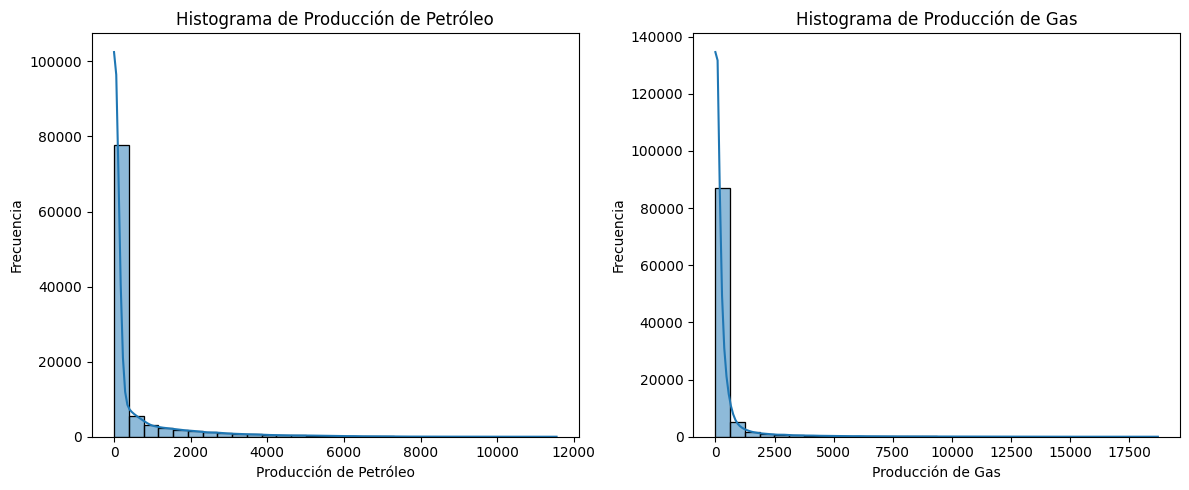

In [6]:
# Histogramas de Producción de petróleo y Producción de gas

import matplotlib.pyplot as plt
# Create histograms for 'Produccion de Petroleo' and 'Produccion de Gas'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(data=prod_ypf, x='Produccion de Petroleo', bins=30, kde=True)
plt.title('Histograma de Producción de Petróleo')
plt.xlabel('Producción de Petróleo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(data=prod_ypf, x='Produccion de Gas', bins=30, kde=True)
plt.title('Histograma de Producción de Gas')
plt.xlabel('Producción de Gas')
plt.ylabel('Frecuencia')

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

### Segundo filtro del dataset

Filtramos el dataset para las features Producción de Petróleo y Producción de Gas para obtener solo aquellos valores mayores a cero.

In [7]:
df_filtrado = prod_ypf[(prod_ypf['Produccion de Petroleo'] > 0) & (prod_ypf['Produccion de Gas'] > 0)]

In [8]:
df_filtrado.shape  #verificamos que una vez filtrado, el dataset quedo con menos registros

(64172, 21)

## **Clustering**

## **K-Means**

El algoritmo K-Means es un modelo de aprendizaje no supervisado que se utiliza para identificar grupos o patrones ocultos dentro de un conjunto de datos sin necesidad de etiquetas previas.

Su objetivo es dividir los datos en k clústeres distintos, de manera que los puntos dentro de cada clúster sean lo más similares entre sí posible (alta cohesión), y lo más distintos de los otros grupos (alta separación).

Esto se logra asignando cada observación al clúster con el centroide más cercano, y actualizando esos centroides de forma iterativa hasta alcanzar la convergencia.

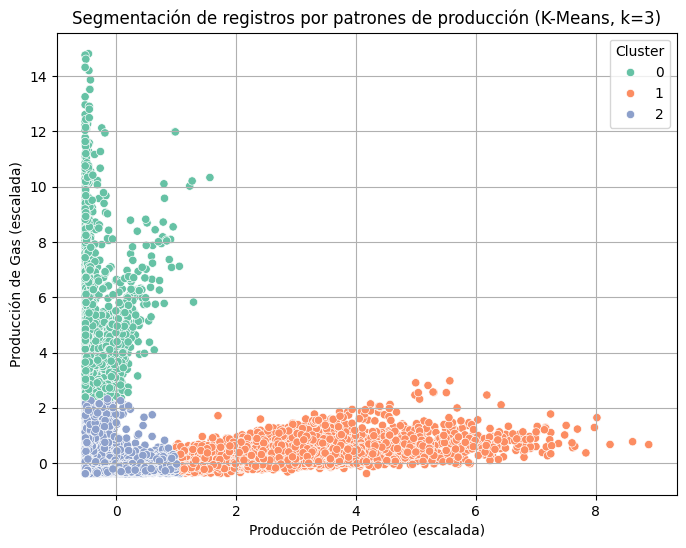

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar variables numéricas
X = df_filtrado[['Produccion de Petroleo', 'Produccion de Gas']].dropna()

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Visualizar
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set2')
plt.xlabel('Producción de Petróleo (escalada)')
plt.ylabel('Producción de Gas (escalada)')
plt.title('Segmentación de registros por patrones de producción (K-Means, k=3)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


El gráfico muestra los resultados del modelo de clustering K-Means aplicado sobre los datos de Producción de Petróleo y Producción de Gas, ambos valores previamente escalados.

Cada punto representa un registro, y el color indica el clúster al que fue asignado según su patrón de producción.

Se identificaron tres grupos diferenciados:

* Cluster 1 (naranja): alta producción de petróleo y baja de gas.

* Cluster 0 (verde): alta producción de gas con baja producción de petróleo.

* Cluster 2 (azul): baja producción tanto de petróleo como de gas.

Este análisis permite distinguir perfiles de pozos o comportamientos productivos que pueden ser relevantes para la toma de decisiones técnicas o económicas.

### Gráfico con centroides

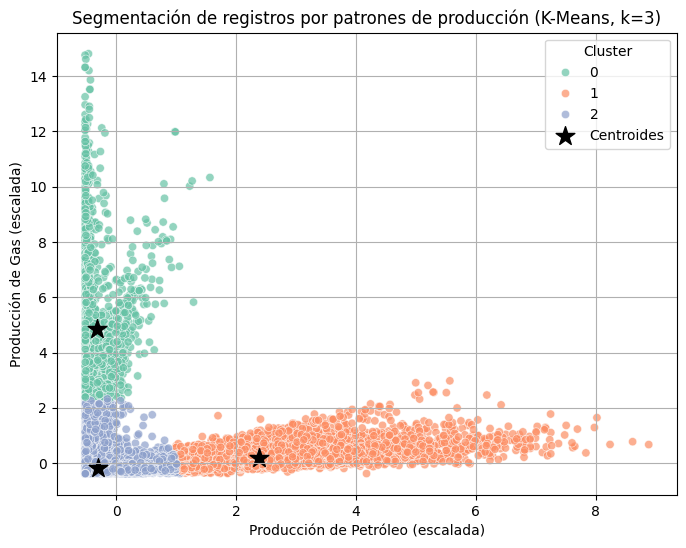

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar variables numéricas
X = df_filtrado[['Produccion de Petroleo', 'Produccion de Gas']].dropna()

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Visualizar con centroides
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set2', alpha=0.7)

# AGREGAR CENTROIDES
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='*', label='Centroides')

# Estética
plt.xlabel('Producción de Petróleo (escalada)')
plt.ylabel('Producción de Gas (escalada)')
plt.title('Segmentación de registros por patrones de producción (K-Means, k=3)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### Método del codo

El gráfico muestra cómo varía la inercia (suma de errores dentro de los clústeres) al incrementar el número de clústeres (k) en el algoritmo K-Means.
A medida que aumenta k, la inercia disminuye, pero con rendimientos decrecientes.

Se observa un "codo" pronunciado en k = 3, lo que sugiere que tres clústeres representan una buena segmentación del conjunto de datos, logrando un balance entre simplicidad del modelo y buena separación de grupos.

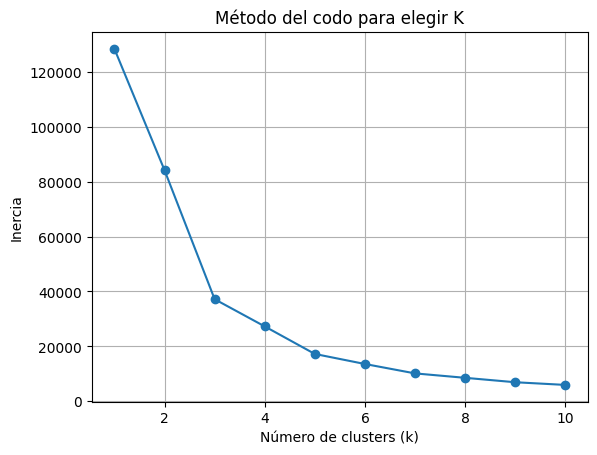

In [25]:
from sklearn.cluster import KMeans

inertias = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para elegir K')
plt.grid(True)
plt.show()


### Silhouette Score

El Silhouette Score mide la calidad del agrupamiento realizado por el modelo K-Means, considerando tanto la cohesión interna de los datos dentro de cada clúster como la separación entre clústeres.

En este caso, el valor obtenido fue de 0.746, lo que indica que los grupos formados están bien definidos, claramente separados entre sí y con una buena consistencia interna.

Este resultado respalda la elección de k = 3 como una segmentación adecuada para los datos de producción de petróleo y gas.

In [26]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.7461589984807048


### Gráfico Silhouette

El gráfico de Silhouette representa, para cada punto, su nivel de pertenencia al clúster asignado. Las barras más largas indican puntos bien agrupados.
Se observa que la mayoría de las muestras tienen un valor positivo de silueta, lo cual confirma que los clústeres están bien definidos y que k=3 fue una elección adecuada.

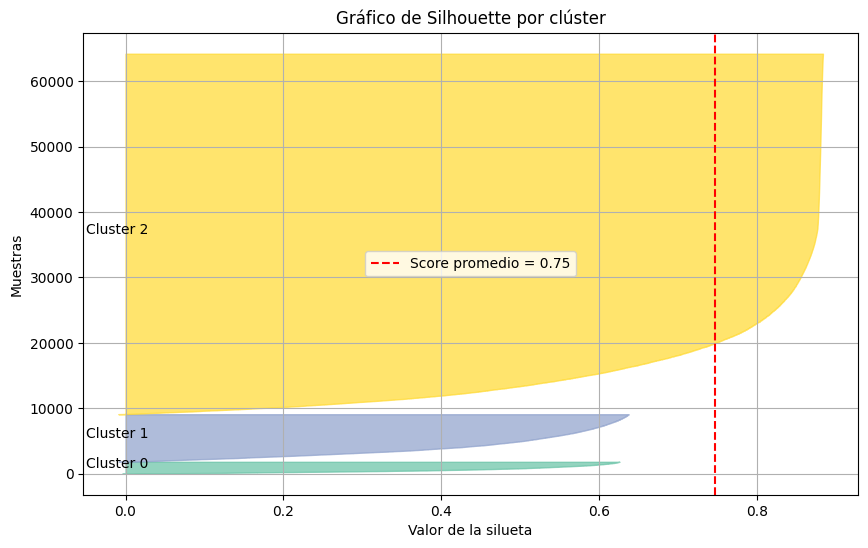

In [27]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Calcular siluetas individuales
silhouette_vals = silhouette_samples(X_scaled, labels)
k = 3

# Inicializar gráfico
plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(k):
    # Extraer valores del clúster i
    ith_cluster_silhouette_vals = silhouette_vals[labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.Set2(i / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
    y_lower = y_upper + 10

# Línea del promedio general
sil_avg = silhouette_score(X_scaled, labels)
plt.axvline(sil_avg, color="red", linestyle="--", label=f'Score promedio = {sil_avg:.2f}')

# Estética
plt.xlabel("Valor de la silueta")
plt.ylabel("Muestras")
plt.title("Gráfico de Silhouette por clúster")
plt.legend()
plt.grid(True)
plt.show()


## **Reducción de la dimensionalidad**

## **Análisis de Componentes Principales**

El PCA es una técnica estadística y de aprendizaje automático que permite transformar un conjunto de variables posiblemente correlacionadas en un conjunto más pequeño de variables no correlacionadas llamadas componentes principales. Estas nuevas variables resumen la mayor parte de la variabilidad de los datos originales con la menor pérdida de información posible.

El objetivo principal del PCA es reducir la cantidad de dimensiones (variables) de un dataset manteniendo la mayor cantidad de información relevante, lo que facilita la visualización, el procesamiento y el análisis.

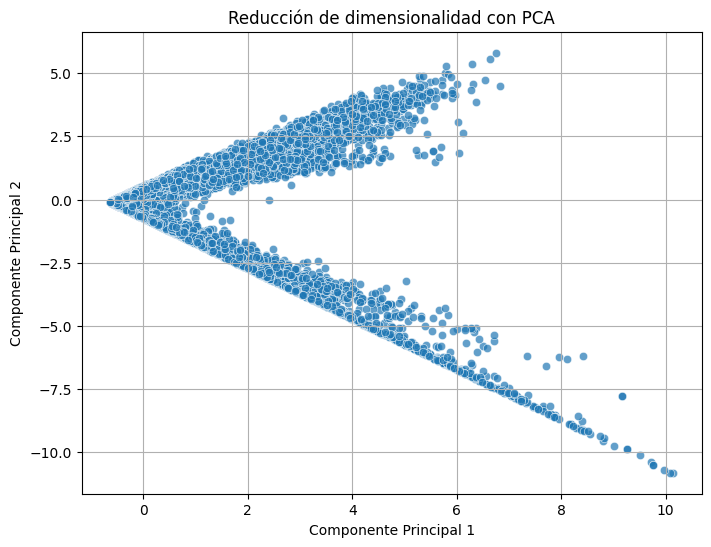

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Selección de variables numéricas
X = df_filtrado[['Produccion de Petroleo', 'Produccion de Gas']].dropna()

# 2. Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar PCA (a 2 componentes para visualización)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Crear DataFrame con componentes principales
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# 5. Visualización
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', alpha=0.7)
plt.title('Reducción de dimensionalidad con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


In [12]:
# Mostrar la varianza explicada
var_exp = pca.explained_variance_ratio_
print(f"Varianza explicada por PC1: {var_exp[0]:.2%}")
print(f"Varianza explicada por PC2: {var_exp[1]:.2%}")

Varianza explicada por PC1: 54.11%
Varianza explicada por PC2: 45.89%


Al tener solo dos variables originales, PCA conserva el 100% de la información al reducirlas a dos componentes principales. La PC1 explica el 54.11% de la variabilidad total y la PC2 el 45.89%, lo que indica que ambas contribuyen casi por igual a la estructura de los datos.